In [ ]:
import pandas as pd
import os.path

if not os.path.exists('grades.csv'):
    !wget https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/grades.csv

#Load data
df_students = pd.read_csv('grades.csv',delimiter=',',header='infer')

#Remove any rows missing data
df_students = df_students.dropna(axis=0, how='any')

# Calculate who passes
passed = pd.Series(df_students.Grade >= 60)

#Saves who passes to dataframe
df_students = pd.concat([df_students, passed.rename("Pass")], axis=1)

df_students

/home/pedro_fernandes/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


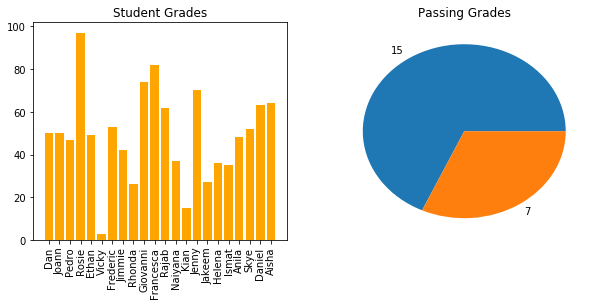

In [24]:
from cProfile import label
from turtle import color
from matplotlib import pyplot as plt

fig, ax = plt.subplots(1,2, figsize=(10,4))

ax[0].bar(x=df_students.Name, height=df_students.Grade, color="orange")

ax[0].set_title("Student Grades")
ax[0].set_xticklabels(df_students.Name, rotation=90)

passes_count = df_students.Pass.value_counts()
ax[1].pie(passes_count, labels=passes_count)
ax[1].set_title("Passing Grades")

fig.show()


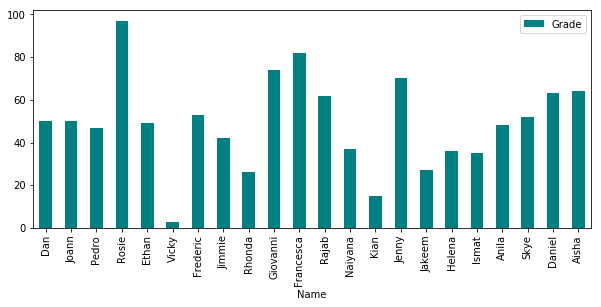

In [26]:
df_students.plot.bar(x='Name', y='Grade', figsize=(10,4), color= "teal")

Minimum:3.00
Mean:49.18
Median:49.50
Mode:50.00
Maximum:97.00



Text(0,0.5,'Frequency')

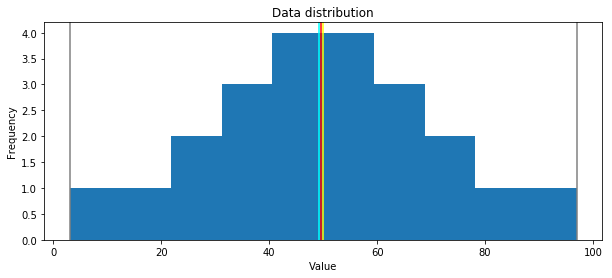

In [29]:
grades = df_students.Grade

min_val = df_students.Grade.min()
max_val = df_students.Grade.max()
mean_val = df_students.Grade.mean()
med_val = df_students.Grade.median()
mod_val = df_students.Grade.mode()[0]

print('Minimum:{:.2f}\nMean:{:.2f}\nMedian:{:.2f}\nMode:{:.2f}\nMaximum:{:.2f}\n'.format(min_val,
                                                                                            mean_val,
                                                                                            med_val,
                                                                                            mod_val,
                                                                                            max_val))


fig= plt.figure(figsize=(10,4))

plt.hist(grades)

plt.axvline(x=min_val, color='gray')
plt.axvline(x=max_val, color='gray')
plt.axvline(x=mean_val, color='cyan')
plt.axvline(x=med_val, color='red')
plt.axvline(x=mod_val, color='yellow')

plt.title("Data distribution")
plt.xlabel("Value")
plt.ylabel("Frequency")

/home/pedro_fernandes/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


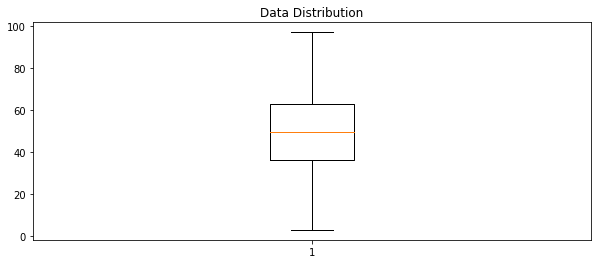

In [30]:
grades = df_students.Grade

fig  = plt.figure(figsize=(10,4))

plt.boxplot(grades)

plt.title("Data Distribution")

fig.show()


Minimum:3.00
Mean:49.18
Median:49.50
Mode:50.00
Maximum:97.00



/home/pedro_fernandes/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


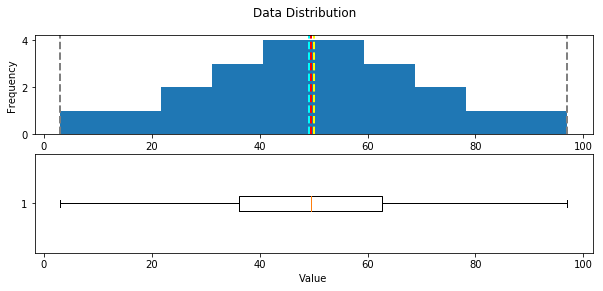

In [32]:
# Create a function that we can re-use
def show_distribution(var_data):
    from matplotlib import pyplot as plt

    # Get statistics
    min_val = var_data.min()
    max_val = var_data.max()
    mean_val = var_data.mean()
    med_val = var_data.median()
    mod_val = var_data.mode()[0]

    print('Minimum:{:.2f}\nMean:{:.2f}\nMedian:{:.2f}\nMode:{:.2f}\nMaximum:{:.2f}\n'.format(min_val,
                                                                                            mean_val,
                                                                                            med_val,
                                                                                            mod_val,
                                                                                            max_val))

    # Create a figure for 2 subplots (2 rows, 1 column)
    fig, ax = plt.subplots(2, 1, figsize = (10,4))

    # Plot the histogram   
    ax[0].hist(var_data)
    ax[0].set_ylabel('Frequency')

    # Add lines for the mean, median, and mode
    ax[0].axvline(x=min_val, color = 'gray', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mean_val, color = 'cyan', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=med_val, color = 'red', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mod_val, color = 'yellow', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=max_val, color = 'gray', linestyle='dashed', linewidth = 2)

    # Plot the boxplot   
    ax[1].boxplot(var_data, vert=False)
    ax[1].set_xlabel('Value')

    # Add a title to the Figure
    fig.suptitle('Data Distribution')

    # Show the figure
    fig.show()

# Get the variable to examine
col = df_students['Grade']
# Call the function
show_distribution(col)

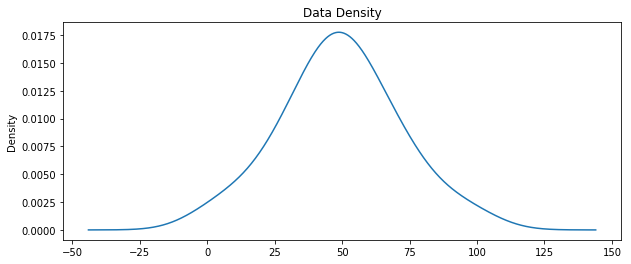

In [33]:
def show_density(data):
    fig = plt.figure(figsize=(10,4))

    data.plot.density()

    plt.title('Data Density')

    plt.show()

show_density(df_students.Grade)
